In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from speclet.bayesian_models.hierarchical_nb import HierarchcalNegativeBinomialModel
from speclet.data_processing.vectors import zscale
from speclet.io import DataFile
from speclet.managers.data_managers import CrisprScreenDataManager

In [4]:
hnb = HierarchcalNegativeBinomialModel()

In [5]:
data_manager = CrisprScreenDataManager(DataFile.DEPMAP_CRC_BONE_LARGE_SUBSAMPLE)
ct_data = data_manager.get_data()
ct_data.head()

/Users/admin/Developer/haigis-lab/speclet/speclet/managers/data_managers.py:139: DtypeWarning: Columns (3,22) have mixed types. Specify dtype option on import or set low_memory=False.
  self._data = pd.read_csv(self.data_file, **read_kwargs)


,sgrna,replicate_id,lfc,p_dna_batch,genome_alignment,hugo_symbol,screen,multiple_hits_on_gene,sgrna_target_chr,sgrna_target_pos,...,num_mutations,any_deleterious,any_tcga_hotspot,any_cosmic_hotspot,is_mutated,copy_number,lineage,primary_or_metastasis,is_male,age
0,AAAGCCCAGGAGTATGGGAG,LS513-311Cas9_RepA_p6_batch2,0.594321,2,chr2_130522105_-,CFC1B,broad,True,2,130522105,...,0,NaN,NaN,NaN,False,0.951337,colorectal,primary,True,63.0
1,AATCGGAATGGTCTCGCTC,LS513_c903R1,-0.272724,ERS717283.plasmid,chr6_81751906_+,TENT5A,sanger,True,6,81751906,...,0,NaN,NaN,NaN,False,0.949854,colorectal,primary,True,63.0
2,ACGCCACTGACACTCAAGG,LS513_c903R1,0.583209,ERS717283.plasmid,chr1_27006713_-,TENT5B,sanger,True,1,27006713,...,0,NaN,NaN,NaN,False,0.961139,colorectal,primary,True,63.0
3,ACTTGTCTCATGAACGTGAT,LS513-311Cas9_RepA_p6_batch2,0.475678,2,chr2_86917638_+,RGPD1,broad,True,2,86917638,...,0,NaN,NaN,NaN,False,0.949234,colorectal,primary,True,63.0
4,AGAAACTTCACCCCTTTCAT,LS513-311Cas9_RepA_p6_batch2,0.296108,2,chr16_18543661_+,NOMO2,broad,True,16,18543661,...,0,NaN,NaN,NaN,False,0.944648,colorectal,primary,True,63.0


In [6]:
valid_data = hnb.data_processing_pipeline(ct_data)

In [7]:
valid_data.shape

(865044, 32)

In [8]:
valid_data.head()

,sgrna,replicate_id,lfc,p_dna_batch,genome_alignment,hugo_symbol,screen,multiple_hits_on_gene,sgrna_target_chr,sgrna_target_pos,...,is_male,age,z_rna_gene_lineage,z_cn_gene,z_cn_cell_line,log_rna_expr,counts_final_total,counts_initial_total,counts_final_rpm,counts_initial_adj
0,AAAGCCCAGGAGTATGGGAG,LS513-311Cas9_RepA_p6_batch2,0.594321,2,chr2_130522105_-,CFC1B,broad,True,2,130522105,...,True,63.0,-0.160128,-0.445925,-0.354485,0.000000,35176093,1.072163e+06,13.309497,257.442323
1,ACTTGTCTCATGAACGTGAT,LS513-311Cas9_RepA_p6_batch2,0.475678,2,chr2_86917638_+,RGPD1,broad,True,2,86917638,...,True,63.0,-0.702651,-0.504988,-0.367375,0.014253,35176093,1.072163e+06,37.928490,766.756365
2,AGAAACTTCACCCCTTTCAT,LS513-311Cas9_RepA_p6_batch2,0.296108,2,chr16_18543661_+,NOMO2,broad,True,16,18543661,...,True,63.0,0.238451,-0.183505,-0.395475,2.005789,35176093,1.072163e+06,29.513684,685.044642
3,AGCTGAGCGCAGGGACCGGG,LS513-311Cas9_RepA_p6_batch2,-0.020788,2,chr1_27012633_-,TENT5B,broad,True,1,27012633,...,True,63.0,-0.782033,-0.202823,-0.294429,0.162393,35176093,1.072163e+06,4.837834,142.977169
4,ATACTCCTGGGCTTTCGGAG,LS513-311Cas9_RepA_p6_batch2,-0.771298,2,chr2_130522124_+,CFC1B,broad,True,2,130522124,...,True,63.0,-0.160128,-0.445925,-0.354485,0.000000,35176093,1.072163e+06,14.588775,706.908890


In [9]:
valid_data.columns

Index(['sgrna', 'replicate_id', 'lfc', 'p_dna_batch', 'genome_alignment',
       'hugo_symbol', 'screen', 'multiple_hits_on_gene', 'sgrna_target_chr',
       'sgrna_target_pos', 'depmap_id', 'counts_final', 'counts_initial',
       'rna_expr', 'num_mutations', 'any_deleterious', 'any_tcga_hotspot',
       'any_cosmic_hotspot', 'is_mutated', 'copy_number', 'lineage',
       'primary_or_metastasis', 'is_male', 'age', 'z_rna_gene_lineage',
       'z_cn_gene', 'z_cn_cell_line', 'log_rna_expr', 'counts_final_total',
       'counts_initial_total', 'counts_final_rpm', 'counts_initial_adj'],
      dtype='object')

In [10]:
valid_data.groupby(["hugo_symbol", "lineage"])[["z_rna_gene_lineage"]].agg(
    ["mean", "std", "min", "max"]
)

z_rna_gene_lineage                              
                                     mean       std       min       max
hugo_symbol lineage                                                    
CFC1B       colorectal      -1.601282e-01  0.000000 -0.160128 -0.160128
            bone             0.000000e+00  0.000000  0.000000  0.000000
RGPD1       colorectal       2.106659e-02  1.047634 -0.726356  2.846313
            bone             2.099294e-02  1.028463 -0.608795  2.922327
NOMO2       colorectal       1.127822e-01  0.832499 -3.758523  1.342848
...                                   ...       ...       ...       ...
KCNE1       bone             2.562053e-17  1.019804 -0.338222  3.450995
TBL1Y       colorectal       1.531342e-17  1.004338 -0.257428  4.711318
            bone             1.708035e-17  1.009756 -0.288675  3.464102
LCE1C       colorectal       2.105595e-17  1.017700 -0.312799  4.403382
            bone             0.000000e+00  0.000000  0.000000  0.000000

[4000 rows x 4 columns]

In [11]:
valid_data.rna_expr.isna().any()

False

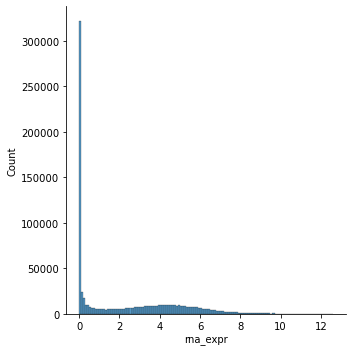

In [12]:
sns.displot(data=valid_data, x="rna_expr", binwidth=0.1);

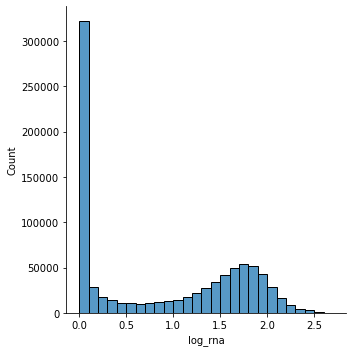

In [13]:
sns.displot(
    data=valid_data.assign(log_rna=lambda d: np.log(d.rna_expr + 1)),
    x="log_rna",
    binwidth=0.1,
);

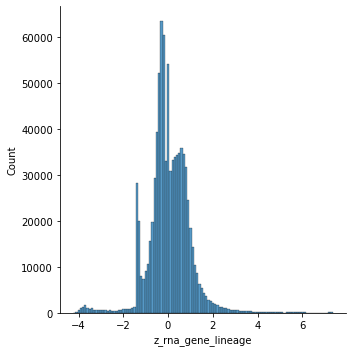

In [14]:
sns.displot(data=valid_data, x="z_rna_gene_lineage", binwidth=0.1);

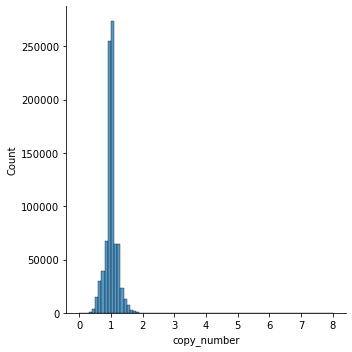

In [15]:
sns.displot(data=valid_data, x="copy_number", binwidth=0.1);

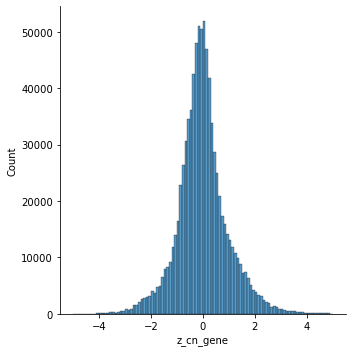

In [16]:
sns.displot(data=valid_data, x="z_cn_gene", binwidth=0.1);

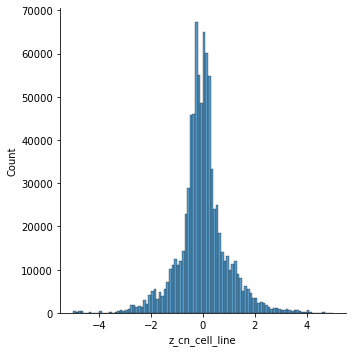

In [17]:
sns.displot(data=valid_data, x="z_cn_cell_line", binwidth=0.1);